In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO

In [2]:
mut_and_host_info_file = "../../../intermediate-results-downsampling/isolating_clade/asian_mut_and_host_info_by_tip.json"
with open(mut_and_host_info_file, 'r') as infile:
    mut_and_host_info_by_tip = json.load(infile)

In [3]:
def extract_gene_lengths(genbank_file):
    gene_lengths = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
        gene_lengths['rdrp'] = gene_lengths.pop("rna-dependent rna polymerase")
        gene_lengths['2Omethyltransferase'] = gene_lengths.pop("2'-o-methyltransferase")
    return gene_lengths

genbank_file = "../../../../nextstrain-build/phylogenetic_subsampling/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196 / 3
gene_codon_counts["s2"] = 1806 / 3


In [4]:
all_genes = ['Hel', 'Nsp2', 'Nsp3', 'Nsp5', 'Nsp6', 'Orf5', 'Orf8b', 'ExoN', 'N', 'NendoU', 'Nsp4', 'Nsp8', 'Orf4b', 'S1', 'S2', 'Nsp1', 'Nsp7', 'Orf3', 'RdRpb', '2Omethyltransferase', 'M', 'Orf4a', 'E', 'Nsp9', 'Nsp10']
data = []
for tip, info in mut_and_host_info_by_tip.items():
    row = {'sample': tip, 'date': info['date']}
    for gene in all_genes:
        num_mutations = len(info['muts_on_path'].get(gene, []))
        gene = gene.lower()
        num_codons = gene_codon_counts.get(gene, 1)  # default to 1 if gene not found
        mutation_rate = num_mutations / num_codons
        row[gene] = mutation_rate
    data.append(row)
df = pd.DataFrame(data)
mutation_rate_by_gene = df.to_csv('../../../intermediate-results-downsampling/isolating_clade/mutation_rate_by_gene.csv')

<Figure size 640x480 with 0 Axes>

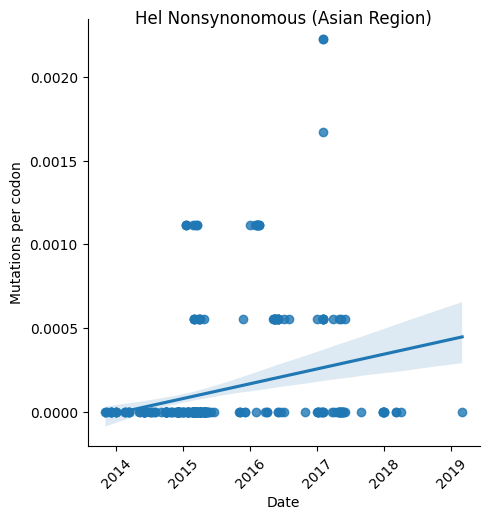

Camel slope: 8.831887546674492e-05 mutations per codon per year
P = 1.319063960497088e-06


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

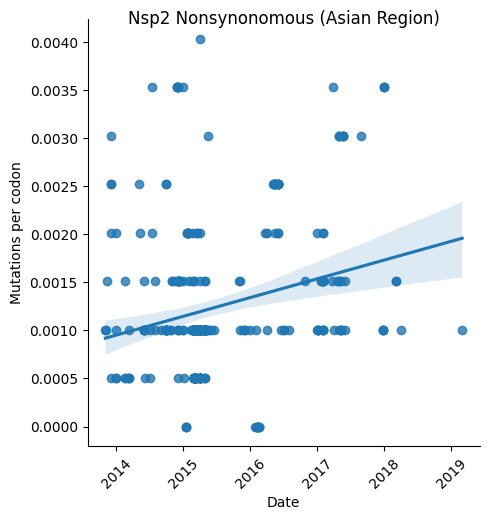

Camel slope: 0.00019522933618677904 mutations per codon per year
P = 4.803799256093514e-06


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

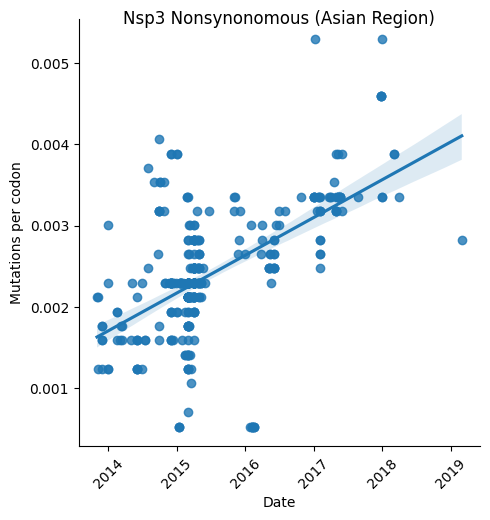

Camel slope: 0.00046408625175422007 mutations per codon per year
P = 6.653686669254358e-32


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

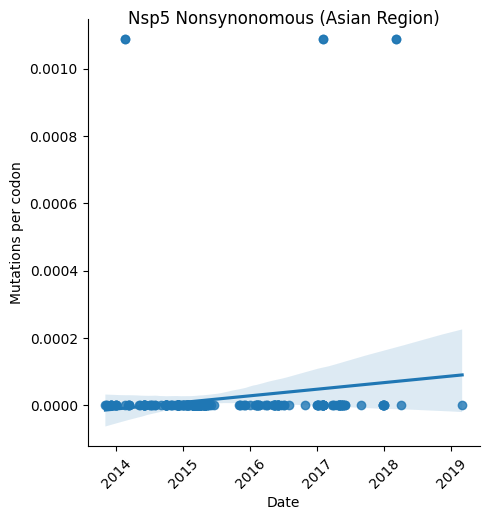

Camel slope: 1.9581752316935858e-05 mutations per codon per year
P = 0.01295911360949375


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

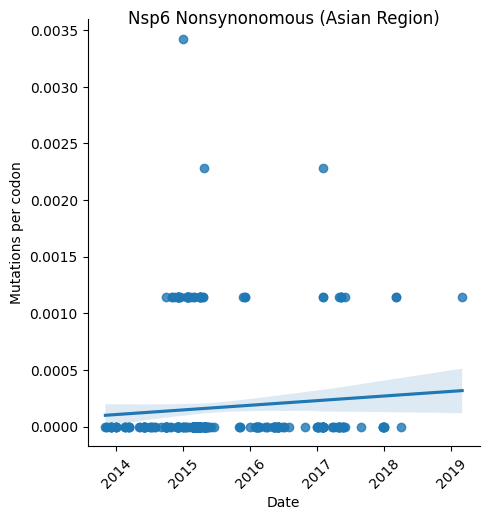

Camel slope: 4.087582464119787e-05 mutations per codon per year
P = 0.10387598323888932


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

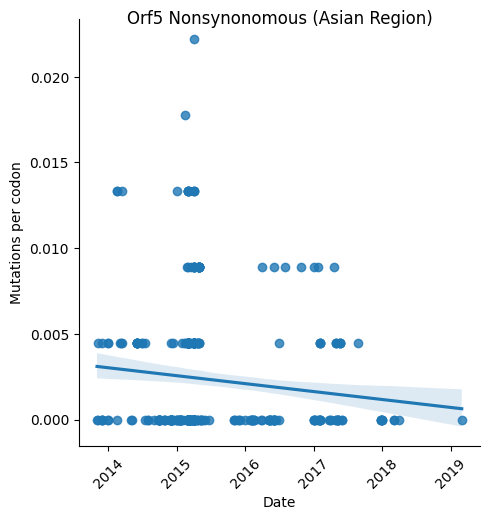

Camel slope: -0.0004628225207236522 mutations per codon per year
P = 0.027892177258890087


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

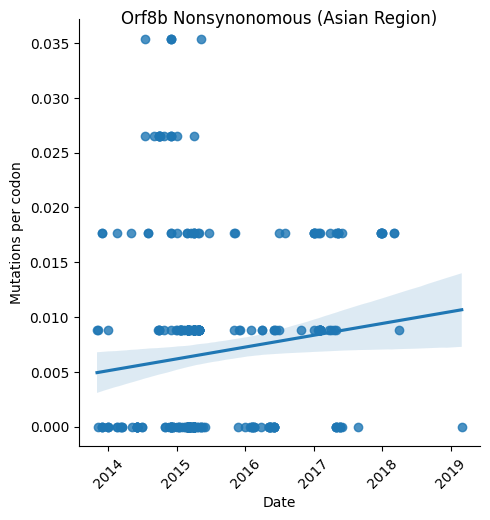

Camel slope: 0.0010766240971505695 mutations per codon per year
P = 0.01893263952506218


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

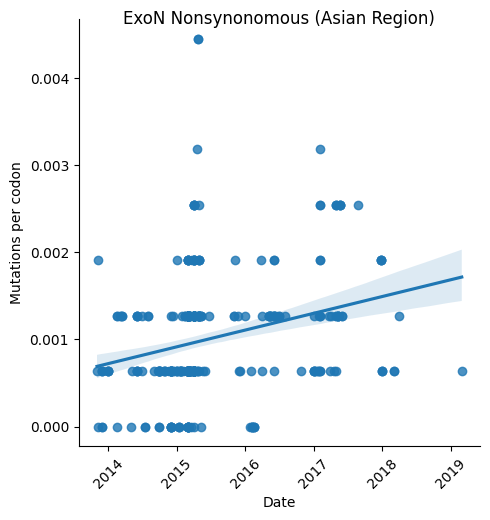

Camel slope: 0.00019236430308432892 mutations per codon per year
P = 2.3819999794437722e-07


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

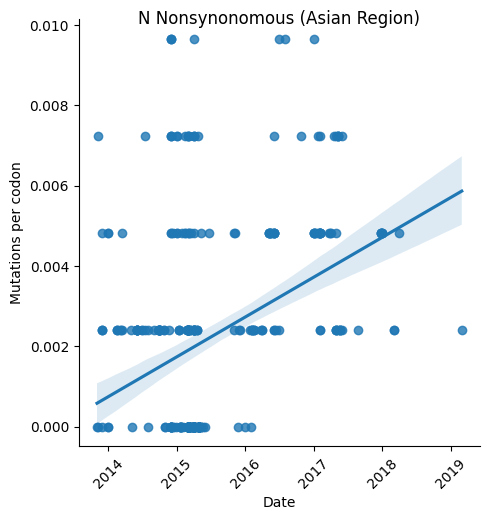

Camel slope: 0.0009915491203781963 mutations per codon per year
P = 5.444045732356741e-13


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

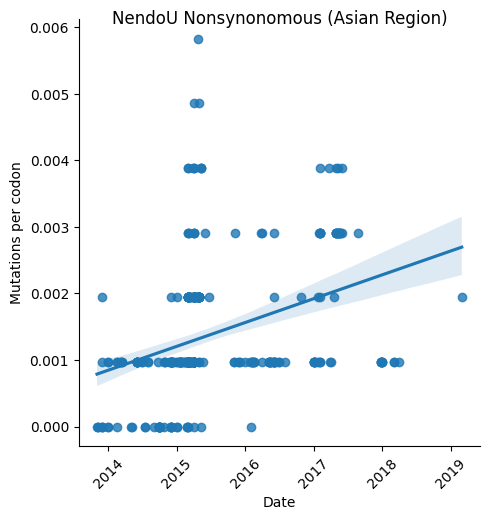

Camel slope: 0.0003581162863616555 mutations per codon per year
P = 9.438312548334603e-12


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

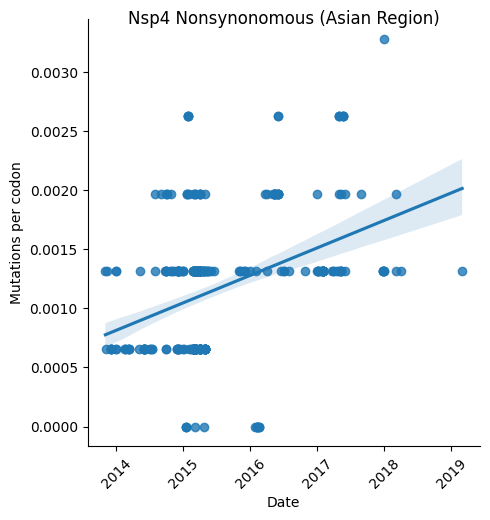

Camel slope: 0.0002326811174151654 mutations per codon per year
P = 1.9592614262939647e-14


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

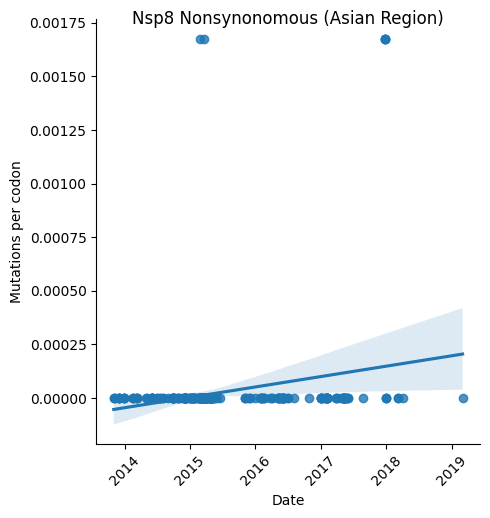

Camel slope: 4.846102448989916e-05 mutations per codon per year
P = 5.630076957079022e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

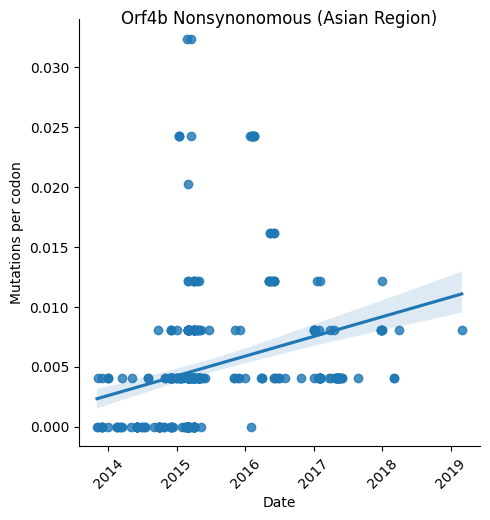

Camel slope: 0.001641883114788624 mutations per codon per year
P = 8.139037835028396e-08


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

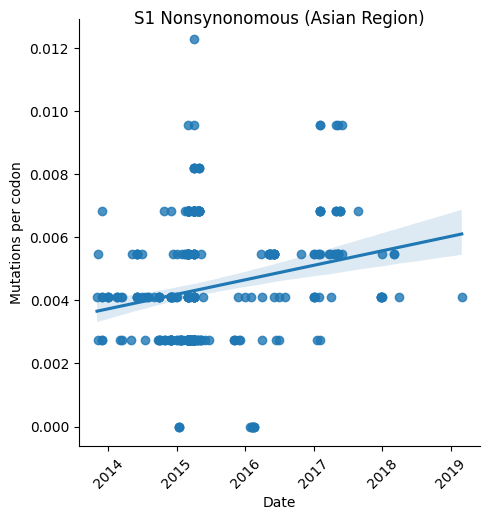

Camel slope: 0.00045920304762649063 mutations per codon per year
P = 2.367644373082606e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

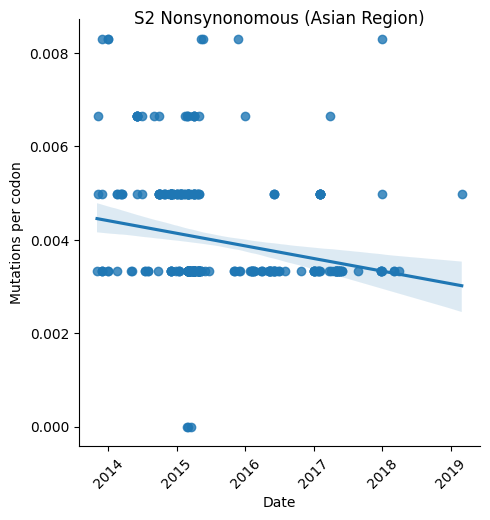

Camel slope: -0.0002696845502538253 mutations per codon per year
P = 6.67721041611734e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

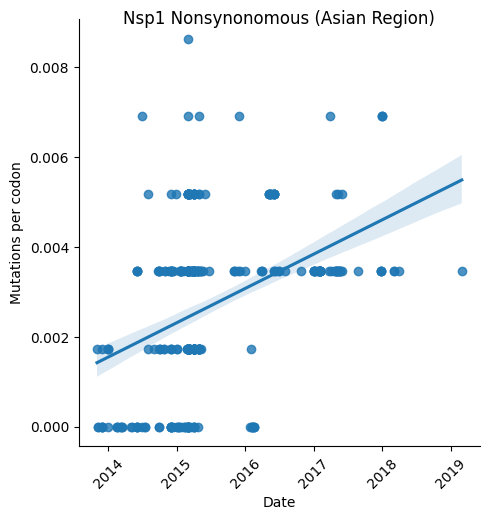

Camel slope: 0.0007631907410920748 mutations per codon per year
P = 5.776963026802219e-16


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

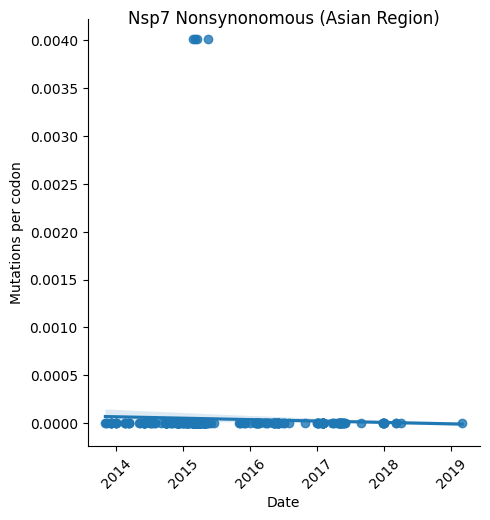

Camel slope: -1.4793605047545386e-05 mutations per codon per year
P = 0.5357185885138599


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

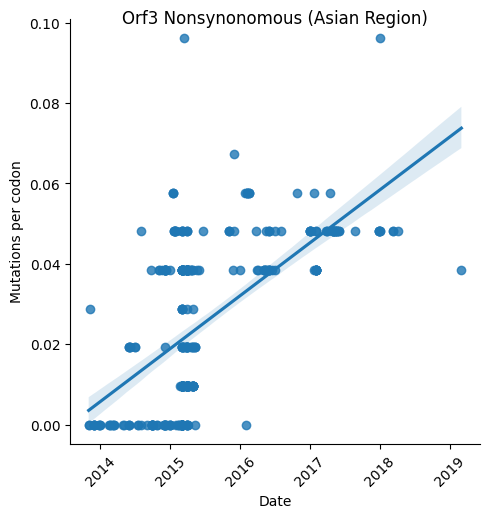

Camel slope: 0.013180026686497554 mutations per codon per year
P = 2.090336092772778e-38


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

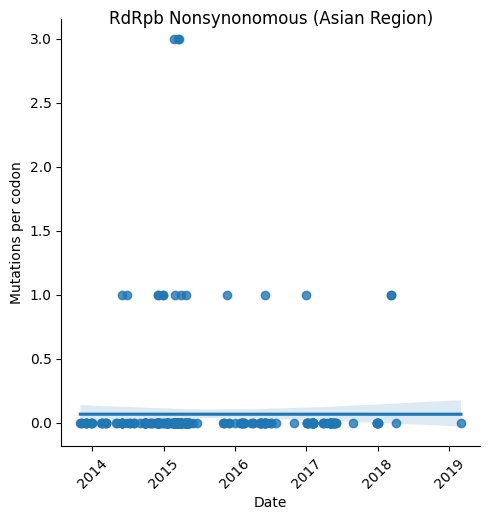

Camel slope: -3.542396279291234e-05 mutations per codon per year
P = 0.9984969302830196


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

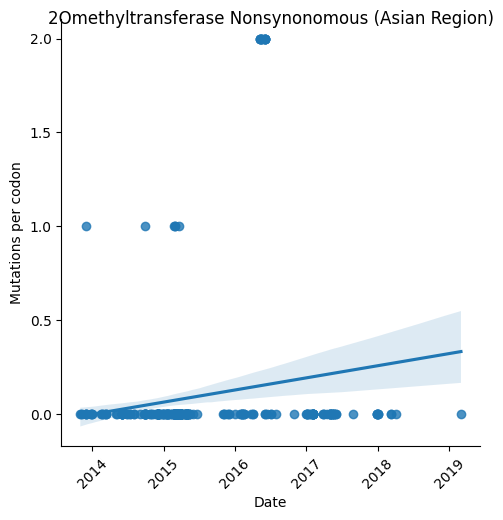

Camel slope: 0.06471525617140321 mutations per codon per year
P = 0.004530020394112244


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

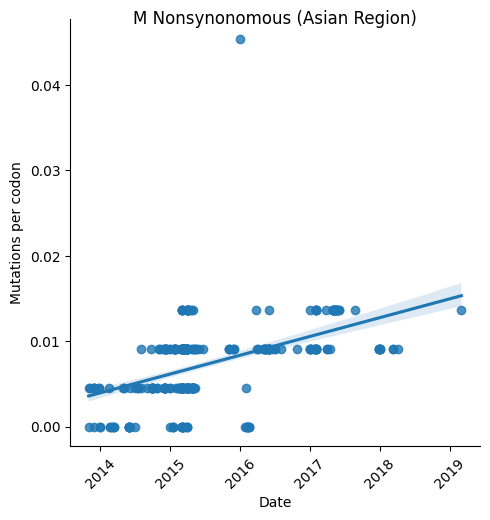

Camel slope: 0.0022045494432931436 mutations per codon per year
P = 1.696787874371129e-21


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

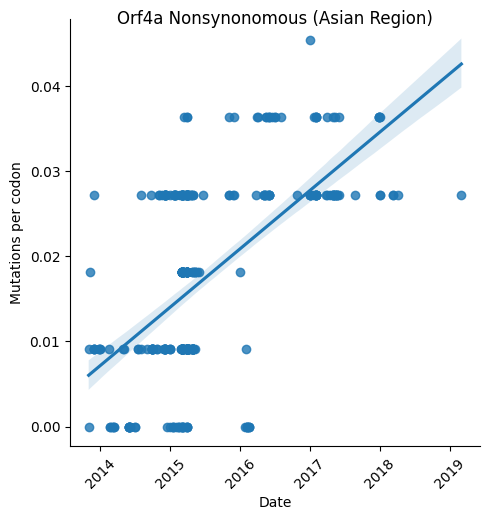

Camel slope: 0.006869442658366725 mutations per codon per year
P = 1.6989833810343616e-34


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

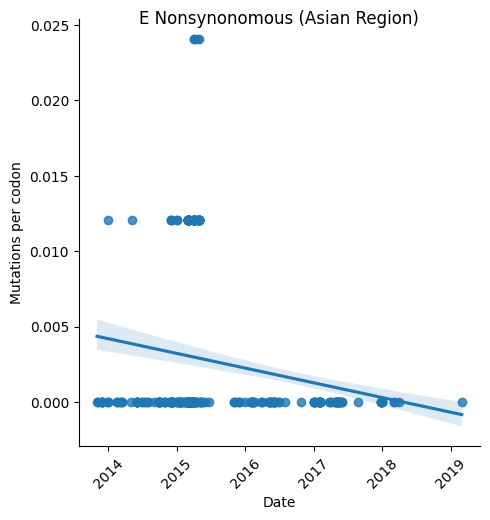

Camel slope: -0.0009743773951978336 mutations per codon per year
P = 0.0011252094252334494


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

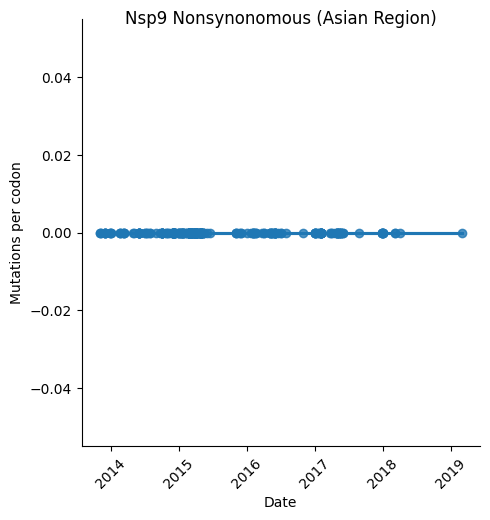

Camel slope: 0.0 mutations per codon per year
P = 1.0


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

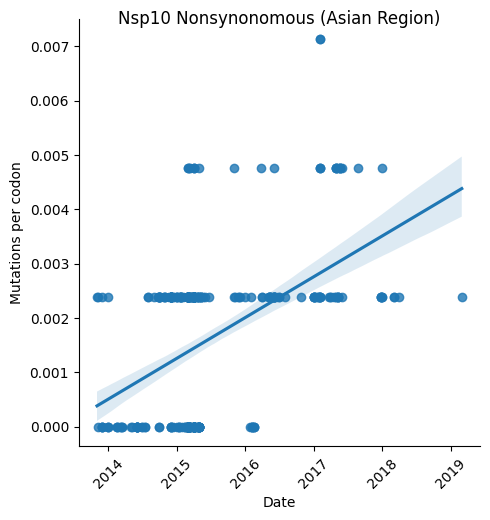

Camel slope: 0.0007507540473004216 mutations per codon per year
P = 2.3105671053479792e-21
[8.831887546674492e-05, 0.00019522933618677904, 0.00046408625175422007, 1.9581752316935858e-05, 4.087582464119787e-05, -0.0004628225207236522, 0.0010766240971505695, 0.00019236430308432892, 0.0009915491203781963, 0.0003581162863616555, 0.0002326811174151654, 4.846102448989916e-05, 0.001641883114788624, 0.00045920304762649063, -0.0002696845502538253, 0.0007631907410920748, -1.4793605047545386e-05, 0.013180026686497554, -3.542396279291234e-05, 0.06471525617140321, 0.0022045494432931436, 0.006869442658366725, -0.0009743773951978336, 0.0, 0.0007507540473004216]


<Figure size 640x480 with 0 Axes>

In [5]:
lin_regress = {}
lin_regress_all = {}
slopes = list(range(0, len(all_genes)))
count = 0
camel_df = df
for gene in all_genes:
    gene_lower = gene.lower()
    plt.figure(gene)
    plot = sns.lmplot(x="date", y=gene_lower, data=df)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mutations per codon')
    plt.title(gene + ' Nonsynonomous (Asian Region)', y=0.97)
    plt.show()
    plt.savefig("../../../intermediate-results-downsampling/isolating_clade/mutation_rate_per_gene/" + gene + "figure.png")
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}

    x=camel_df['date'].values
    y=camel_df[gene_lower].values
    camel_slope, camel_intercept, camel_r, camel_p, camel_se = stats.linregress(x, y)
    lin_regress[gene]['Camel'] = camel_slope
    lin_regress_all[gene]['Camel'] = {'slope':camel_slope, 'intercept':camel_intercept, 'r': camel_r, 'p': camel_p, 'se':camel_se}
    slopes[count] = camel_slope
    print("Camel slope: " + str(camel_slope) + " mutations per codon per year"),
    print("P = " + str(camel_p))
    count += 1

print(slopes)
df_results = pd.DataFrame(lin_regress)
df_results_all = pd.DataFrame(lin_regress_all)
linear_regression_results = df_results.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results.csv')
linear_regression_results_all = df_results_all.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results_all.csv')

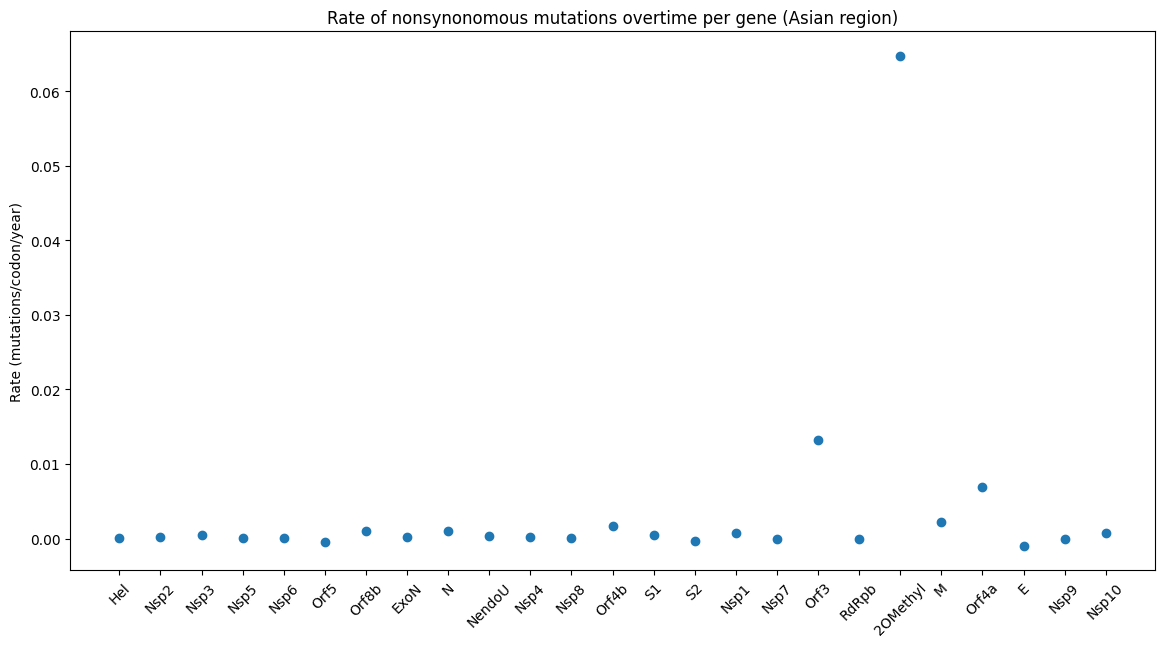

[8.831887546674492e-05, 0.00019522933618677904, 0.00046408625175422007, 1.9581752316935858e-05, 4.087582464119787e-05, -0.0004628225207236522, 0.0010766240971505695, 0.00019236430308432892, 0.0009915491203781963, 0.0003581162863616555, 0.0002326811174151654, 4.846102448989916e-05, 0.001641883114788624, 0.00045920304762649063, -0.0002696845502538253, 0.0007631907410920748, -1.4793605047545386e-05, 0.013180026686497554, -3.542396279291234e-05, 0.06471525617140321, 0.0022045494432931436, 0.006869442658366725, -0.0009743773951978336, 0.0, 0.0007507540473004216]


In [6]:
gene_names = list(all_genes)
for i in range(len(gene_names)):
    if gene_names[i] == '2Omethyltransferase':
        gene_names[i] = '2OMethyl'
plt.figure(figsize=(14,7))
plt.scatter(gene_names, slopes)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.ylabel("Rate (mutations/codon/year)")
plt.title("Rate of nonsynonomous mutations overtime per gene (Asian region)")
plt.show()
print(slopes)